In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Lecture des données


In [135]:
data1 = pd.read_csv('./steam.csv')
data1 = data1[:2000]
data1.shape

(2000, 5)

In [136]:
data1.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


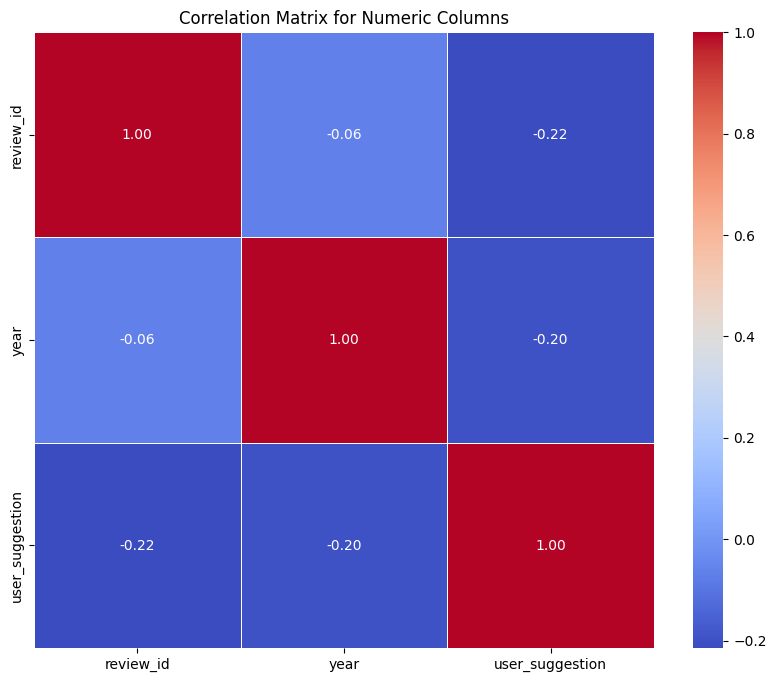

In [137]:
corr = data1[data1.select_dtypes(include=['int64', 'float64']).columns.tolist()].corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

## Analyse des données

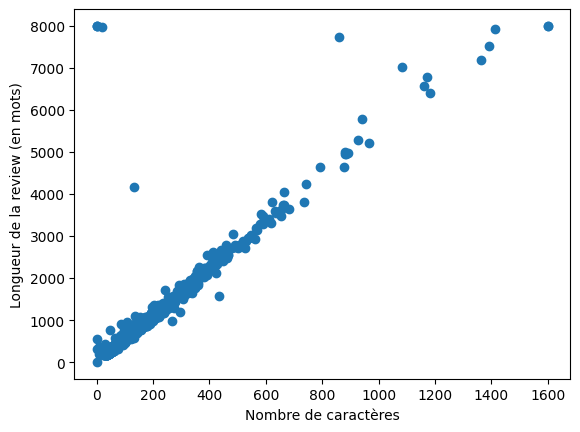

In [138]:
data1 = data1.drop(columns={'review_id', 'title', 'user_suggestion'})

data1["words_count"] = data1["user_review"].str.split().str.len()

data1["user_review_lenght"] = data1["user_review"].str.len()

plt.scatter(data1["words_count"], data1["user_review_lenght"])
plt.xlabel("Nombre de caractères")
plt.ylabel("Longueur de la review (en mots)")
plt.show()

## Nettoyage des données

In [139]:

data1["user_review"] = data1["user_review"].str.lower()

data1 = data1.dropna(how="all")
data1 = data1.drop_duplicates()

data1

,year,user_review,words_count,user_review_lenght
0,2016.0,i'm scared and hearing creepy voices. so i'll...,132,710
1,2016.0,"best game, more better than sam pepper's youtu...",44,335
2,2016.0,"a littly iffy on the controls, but once you kn...",70,397
3,2015.0,"great game, fun and colorful and all that.a si...",47,280
4,2015.0,not many games have the cute tag right next to...,67,334
...,...,...,...,...
1995,2014.0,best moba i've ever come across and trust me o...,58,274
1996,2014.0,i have been using several russian language sim...,71,397
1997,2015.0,be aware that the community in this game is ma...,37,192
1998,2018.0,let me tell u guys the truth of dotaim one of ...,331,1743


### Suppression des lignes ou les commentaires sont trop court ou trop long
On a fixé une limite de caractères comprises entre 100 et 500  

In [140]:
data1 = data1.query("user_review_lenght >= 100 and user_review_lenght <= 500")
data1

,year,user_review,words_count,user_review_lenght
1,2016.0,"best game, more better than sam pepper's youtu...",44,335
2,2016.0,"a littly iffy on the controls, but once you kn...",70,397
3,2015.0,"great game, fun and colorful and all that.a si...",47,280
4,2015.0,not many games have the cute tag right next to...,67,334
5,2015.0,"early access reviewit's pretty cute at first, ...",32,209
...,...,...,...,...
1992,2013.0,judging by the fact that i managed to play 14 ...,41,201
1995,2014.0,best moba i've ever come across and trust me o...,58,274
1996,2014.0,i have been using several russian language sim...,71,397
1997,2015.0,be aware that the community in this game is ma...,37,192


## NLTK

In [141]:
import nltk

# Téléchargement des modules nécessaires
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Tokenisation des reviews
reviews = data1["user_review"].tolist()
tokenized_reviews = [nltk.word_tokenize(review) for review in reviews]

# Lemmatisation et suppression des mots vides
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
processed_reviews = [[lemmatizer.lemmatize(word) for word in review if word not in stopwords] for review in tokenized_reviews]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cadet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cadet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cadet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cadet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [142]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for review, processed_review in zip(reviews, processed_reviews):
    scores = analyzer.polarity_scores(review)
    print(f"Processed review: {processed_review}")
    print(f"Sentiment scores: {scores}\n")
    
    

Processed review: ['best', 'game', ',', 'better', 'sam', 'pepper', "'s", 'youtube', 'account', '.', '10/10what', "'ll", 'need', 'play', ':', 'computersome', 'extra', 'pants.pros', ':', 'scary', 'hell.fun.adventure.spooky.did', 'forgot', 'mention', 'scary', 'hell', '?', "'ll", 'get', 'pants/briefs', 'wardrobe.time', 'consuming', "'re", 'bored.cons', ':', 'buying', 'pants/briefs', '.', "n't", 'downloaded', 'yet', '.']
Sentiment scores: {'neg': 0.062, 'neu': 0.795, 'pos': 0.143, 'compound': 0.6361}

Processed review: ['littly', 'iffy', 'control', ',', 'know', 'play', ',', 'easy', 'master', '.', "'ve", 'made', 'floor', '1000', ',', 'due', 'certain', 'circumstance', 'unable', 'finish', '.', 'game', 'related', ',', "n't", 'worry', ',', 'bug/glitch', 'antyhing.i', 'highly', 'recommend', 'casual', 'play', ',', 'maybe', 'friend', 'two', 'watching', '.', 'hilarity', 'ensues', ',', 'especially', 'hit', 'floor', '150.', 'fun', 'fellow', 'fleshlings', '!']
Sentiment scores: {'neg': 0.0, 'neu': 0.66